#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt
from math import log
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
import os
import seaborn as sns


#**Ejercicio-1.** 

In [ ]:

# drive.mount('/content/drive')
# df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_facebook/dataset_Facebook.csv', sep=';')
# df.head()





In [ ]:
# print('Downloading started')

# #Defining the zip file URL
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip'

# # Split URL to get the file name
# filename = url.split('/')[-1]

# # Downloading the file by sending the request to the URL
# #Para poder usar request necesitamos la libreria import requests, zipfile
# from io import BytesIO
# import requests, zipfile

# req = requests.get(url)
# print('Downloading Completed')


# # # # extracting the zip file contents
# zipfile= zipfile.ZipFile(BytesIO(req.content))
# zipfile.extractall('/content/sample_data/dataset_Facebook')
df = pd.read_csv("dataset_Facebook.csv", sep=';')

In [ ]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
df.rename(columns = {'Lifetime People who have liked your Page and engaged with your post':'LPE'
}, inplace = True)

In [ ]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
df = df[['Category'
             , 'Page total likes'
             , 'Post Month'
             , 'Post Hour'
             , 'Post Weekday'
             , 'Paid', 'Type'
             , 'LPE']]

print(df.head())

   Category  Page total likes  Post Month  Post Hour  Post Weekday  Paid  \
0         2            139441          12          3             4   0.0   
1         2            139441          12         10             3   0.0   
2         3            139441          12          3             3   0.0   
3         2            139441          12         10             2   1.0   
4         2            139441          12          3             2   0.0   

     Type   LPE  
0   Photo   119  
1  Status  1108  
2   Photo   132  
3   Photo  1386  
4   Photo   396  


In [ ]:
X = df[["Category","Page total likes", "Type", "Post Month", "Post Hour", "Post Weekday", "Paid"]]
y= df[['LPE']]


In [ ]:
X

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0
...,...,...,...,...,...,...,...
495,3,85093,Photo,1,2,7,0.0
496,2,81370,Photo,1,8,5,0.0
497,1,81370,Photo,1,2,5,0.0
498,3,81370,Photo,1,11,4,0.0


In [ ]:
y

,LPE
0,119
1,1108
2,132
3,1386
4,396
...,...
495,392
496,301
497,363
498,370


In [ ]:
df.shape

(500, 8)

#**Ejercicio-2.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400, 1), (100, 1))

#**Ejercicio-3.**

In [ ]:
def mi_RMSE(y_val, y_hatVal): #yval true y y_hatVal es predicciones
  #return np.sqrt(np.mean(np.square(y_val-y_hatVal)))
  return (np.mean(np.square(y_val - y_hatVal))) **(1/2)
 
# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(y_val, y_hatVal):
  return np.mean(np.abs(y_val - y_hatVal))


# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(y_val, y_hatVal):
  return np.mean(np.abs((y_val - y_hatVal)/y_val))*100

#**Ejercicio-4.**

In [ ]:
X.columns

Index(['Category', 'Page total likes', 'Type', 'Post Month', 'Post Hour',
       'Post Weekday', 'Paid'],
      dtype='object')

In [ ]:
df.isna().any()

Category            False
Page total likes    False
Post Month          False
Post Hour           False
Post Weekday        False
Paid                 True
Type                False
LPE                 False
dtype: bool

In [ ]:
categorica1 = ['Category']
categorica2 = ['Type']
ordinaria = ['Post Month', 'Post Hour', 'Post Weekday']
numeric = ['Page total likes']
binaria = ['Paid']

In [ ]:
categorica3=categorica1 +categorica2
print(categorica3)

['Category', 'Type']


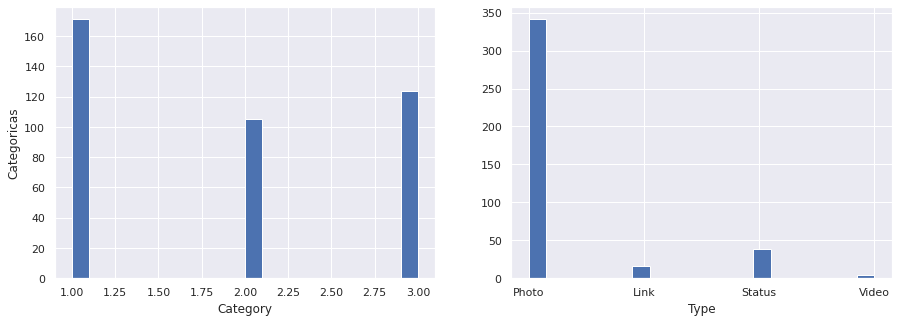

In [ ]:
#se aplica a las variables de entrada categoricas
sns.set(rc={'figure.figsize':(15,5)})

fig, axes=plt.subplots(1,2)
for k in range(0,2):
  plt.subplot(1,2, k+1)

  Transf0= X_train[categorica3].iloc[:,k].to_numpy().reshape(-1,1)
  plt.hist(Transf0, bins=20)
  plt.xlabel(categorica3[k])
  if k==0:
    plt.ylabel('Categoricas')

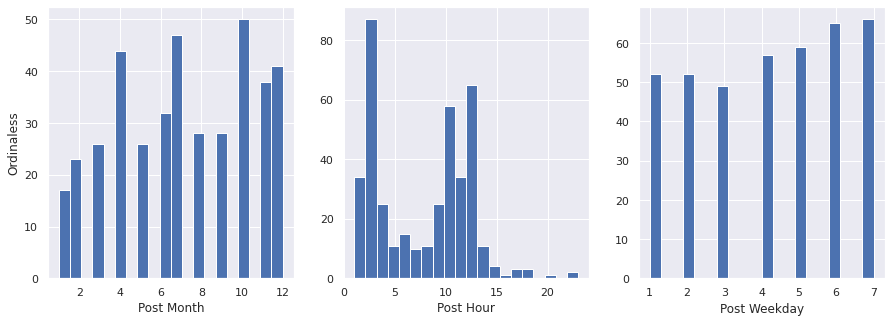

In [ ]:
#se aplica a las variables de entrada ordinales
sns.set(rc={'figure.figsize':(15,5)})

fig, axes=plt.subplots(1,3)
for k in range(0,3):
  plt.subplot(1,3, k+1)

  Transf0= X_train[ordinaria].iloc[:,k].to_numpy().reshape(-1,1)
  plt.hist(Transf0, bins=20)
  plt.xlabel(ordinaria[k])
  if k==0:
    plt.ylabel('Ordinaless')

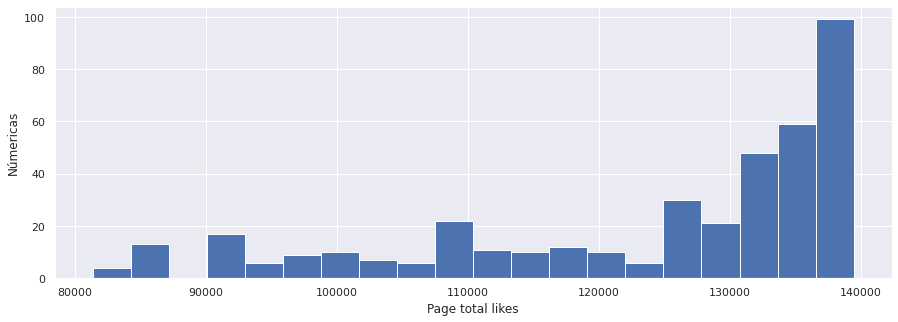

In [ ]:
#se aplica a las variables de entrada númericas
sns.set(rc={'figure.figsize':(15,5)})

fig, axes=plt.subplots(1,1)
for k in range(0,1):
  plt.subplot(1,1, k+1)

  Transf0= X_train[numeric].iloc[:,k].to_numpy().reshape(-1,1)
  plt.hist(Transf0, bins=20)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('Númericas')

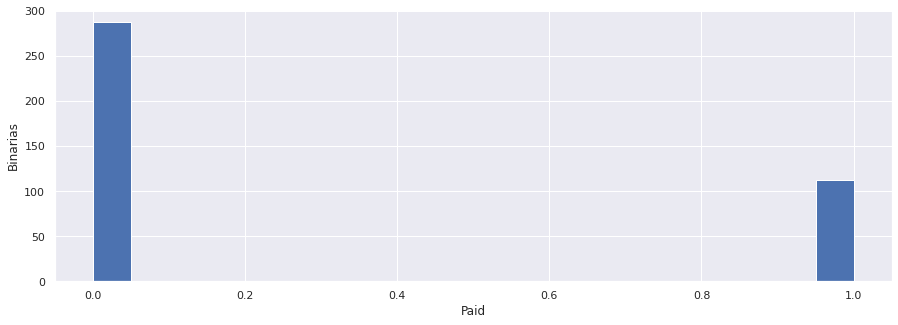

In [ ]:
#se aplica a las variables de entrada binarias
sns.set(rc={'figure.figsize':(15,5)})

fig, axes=plt.subplots(1,1)
for k in range(0,1):
  plt.subplot(1,1, k+1)

  Transf0= X_train[binaria].iloc[:,k].to_numpy().reshape(-1,1)
  plt.hist(Transf0, bins=20)
  plt.xlabel(binaria[k])
  if k==0:
    plt.ylabel('Binarias')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train_nor= X_train[numeric].copy()
scaler=MinMaxScaler(feature_range=(1,2))

scaler.fit(X_train_nor)

X_Train_NOM = scaler.transform(X_train_nor)

X_Train_NOM = pd.DataFrame(X_Train_NOM, dtype= 'float')

X_Train_NOM



,0
0,1.859810
1,1.289732
2,1.095383
3,1.980851
4,1.520914
...,...
395,1.830535
396,1.973343
397,1.456975
398,1.859810


In [ ]:
from sklearn.preprocessing import power_transform

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

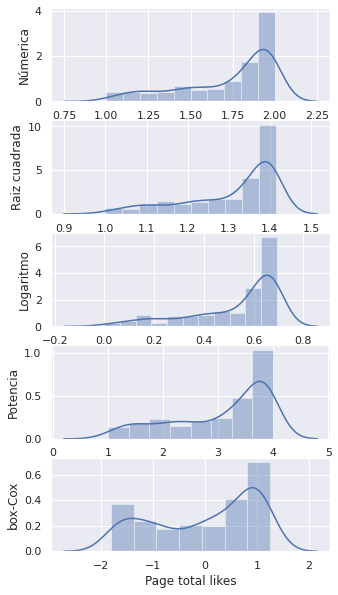

In [ ]:
#se aplica a las variables de entrada númericas
sns.set(rc={'figure.figsize':(5,10)})

k=0
fig, axes=plt.subplots(5,1)
for k in range(0,1):
  plt.subplot(5,1, k+1)

  Transf0= X_Train_NOM.iloc[:,k].to_numpy().reshape(-1,1)
  sns.distplot(Transf0)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('Númerica')

  plt.subplot(5,1, k+2)
  Transf1= np.sqrt(Transf0)
  sns.distplot(Transf1)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('Raiz cuadrada')

  plt.subplot(5,1, k+3)
  Transf2= np.log(Transf0)
  sns.distplot(Transf2)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('Logaritmo')


  plt.subplot(5,1, k+4)
  Transf3= Transf0**2
  sns.distplot(Transf3)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('Potencia')

    
  plt.subplot(5,1, k+5)
  Transf4= power_transform(X_Train_NOM.iloc[:,k].to_numpy().reshape(-1,1), method='box-cox')
  sns.distplot(Transf4)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('box-Cox')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

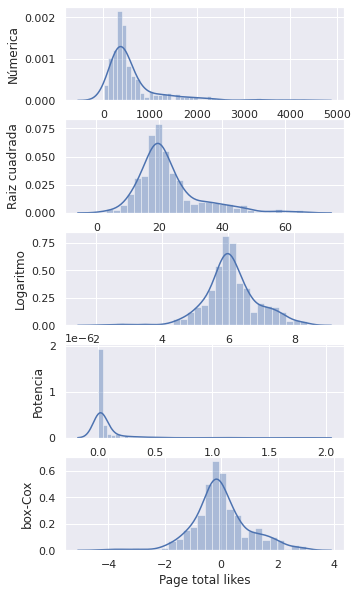

In [ ]:
#se aplica a las variables de entrada númericas
sns.set(rc={'figure.figsize':(5,10)})

k=0
fig, axes = plt.subplots(5,1)
for k in range(0,1):
  plt.subplot(5,1, k+1)

  Transf0= y_train.iloc[:,k].to_numpy().reshape(-1,1)
  sns.distplot(Transf0)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('Númerica')

  plt.subplot(5,1, k+2)
  Transf1= np.sqrt(Transf0)
  sns.distplot(Transf1)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('Raiz cuadrada')

  plt.subplot(5,1, k+3)
  Transf2= np.log(Transf0)
  sns.distplot(Transf2)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('Logaritmo')


  plt.subplot(5,1, k+4)
  Transf3= Transf0**2
  sns.distplot(Transf3)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('Potencia')

    
  plt.subplot(5,1, k+5)
  Transf4= power_transform(y_train.iloc[:,k].to_numpy().reshape(-1,1), method='box-cox')
  sns.distplot(Transf4)
  plt.xlabel(numeric[k])
  if k==0:
    plt.ylabel('box-Cox')

>De acuerdo a las gráficas anteriores se decide realizar transformación con logaritmo en la entrada y salida, puesto realiza un ajuste donde los datos estan distribuidos uniformemente.

Variable de Salida - Y
La variable de salida requiere dos funciones: la transformación deseada y su función inversa:

In [ ]:
# Transformación para disminuir sesgo positivo:
def y_Transform(Y):
  #print("Transf(y)\n")  # Por si deseas ver cuándo se manda llamar esta función.
  Y_ = Y.copy() 
  Y_ = np.log(Y_)
  return Y_

# Inversa de la variable de salida que se usará para las predicciones:
def y_inverseTransform(Y):
  #print("invTransf(y)\n")
  Y_ = Y.copy() 
  Y_ = np.exp(Y_)
  return Y_

Podemos observar la variable de 'Page total likes' esta sesgado a la izquierda, es decir, la mayor cantidad de datos se concentrada a la izquierda y podemos observarlo en el  Box-plot, donde la media esta alejada de la mediana, es decir, es mejor hacer una imputación de los datos faltantes por la mediana. Las variables 'Post Weedkday' y 'Month tienen la media cerca a la mediana y se puede realizar la imputación por media o mediana, y la variable 'Post Hour' aunque la media esta cerca a la mediana, tiene sesgo a la derecha y tendríamos que determinar cual será la mejor imputación en este caso.



In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, cross_validate,  RepeatedStratifiedKFold, learning_curve, validation_curve, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_transformer = Pipeline(steps = [('imMedian', SimpleImputer(strategy='median')),   
                                        ('scaler', MinMaxScaler(feature_range=(1,2)))]) #('box-cox', PowerTransformer(method='box-cox')
num_pipeline_nombres = numeric



cat1_transformer = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), 
                                            ('encoder', OneHotEncoder(handle_unknown= 'ignore'))])     

cat1_pipeline_nombres = categorica1


cat2_transformer = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), 
                                            ('encoder', OneHotEncoder(handle_unknown= 'ignore'))])     

cat2_pipeline_nombres = categorica2


ord_transformer = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),])     

ord_pipeline_nombres = ordinaria

bin_transformer = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),])     

bin_pipeline_nombres = binaria

salida_transformer = Pipeline(steps = [('impMedian', SimpleImputer(strategy='median')),('scalar', MinMaxScaler(feature_range=(1,2)))])     

salida_pipeline_nombres = y

columnasTransformer = ColumnTransformer(transformers = [('numeric', numeric_transformer, num_pipeline_nombres),
                                                       ('categorica1', cat1_transformer, cat1_pipeline_nombres ), ('categorica2', cat2_transformer, cat2_pipeline_nombres), 
                                                       ('ordinaria', ord_transformer, ord_pipeline_nombres), ('binaria', bin_transformer, bin_pipeline_nombres), 
])


columnasTransformerSalida = ColumnTransformer(transformers =[('numeric', salida_transformer, salida_pipeline_nombres)])

#**Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la
actividad. Consulta su documentación correspondiente:
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [ ]:
from sklearn.compose import TransformedTargetRegressor

In [ ]:
DX_train, DX_test, Dy_train, Dy_test = train_test_split(X_train, y_train, train_size=0.75, random_state=0)

dummy_regr = DummyRegressor(strategy='mean')

pipeline = Pipeline(steps = [('ct', columnasTransformer), 
                                 ('Dummy Regressor', dummy_regr)])


modelo=TransformedTargetRegressor(regressor=pipeline, 
                                  func= y_Transform, 
                                  inverse_func= y_inverseTransform)

# Entrenamos con los datos de entrenamiento:
modelo.fit(DX_train, Dy_train)

# Predicciones con los datos de prueba:
y_test_hat= modelo.predict(DX_test)

# Predicciones con los datos de entrenamiento:
y_train_hat= modelo.predict(DX_train)

print("Validación\n")


print("RMSE con dummy regression: {}".format(mi_RMSE(Dy_test, y_test_hat)))
print("MAE con dummy regression: {}".format(mi_MAE(Dy_test, y_test_hat)))
print("MAPE con dummy regression: {}".format(mi_MAPE(Dy_test, y_test_hat)))

print("Entrenamiento\n")

print("RMSE con dummy regression: {}".format(mi_RMSE(Dy_train, y_train_hat)))
print("MAE con dummy regression: {}".format(mi_MAE(Dy_train, y_train_hat)))
print("MAPE con dummy regression: {}".format(mi_MAPE(Dy_train, y_train_hat)))




Validación

RMSE con dummy regression: LPE    682.175831
dtype: float64
MAE con dummy regression: LPE    351.686208
dtype: float64
MAPE con dummy regression: LPE    107.99798
dtype: float64
Entrenamiento

RMSE con dummy regression: LPE    626.293276
dtype: float64
MAE con dummy regression: LPE    338.682841
dtype: float64
MAPE con dummy regression: LPE    84.740336
dtype: float64


#**Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor
modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o
subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de
iteraciones para que todos los modelos converjan.

In [ ]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LinearRegression())
  nombres.append('LR')
  
  # RF - Bosque aleatorio:
  modelos.append(RandomForestRegressor())
  nombres.append('RF')

  #MLP - MLPRegressor: perceptron multicapa
  modelos.append(MLPRegressor(max_iter=2000))
  nombres.append('MLP')
  
  return modelos, nombres

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

In [45]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):
  
  pipeline = Pipeline(steps=[('ct', columnasTransformer),('m',modelos[i])])

  # modelo=TransformedTargetRegressor(regressor=pipeline, 
  #                                 func= y_Transform, 
  #                                 inverse_func= y_inverseTransform)
  
  kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)
  mismetricas = {
      "neg_mean_absolute_error":make_scorer(mi_MAE),
      "neg_mean_absolute_percentage_error":make_scorer(mi_MAPE, greater_is_better=False),
     "neg_mean_square_error":make_scorer(mi_RMSE)}



  resultadosOU = cross_validate(pipeline, X_train, np.ravel(y_train), scoring=mismetricas, cv=kfold, return_train_score=True)

  resultados.append(resultadosOU)

  print("Test \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_neg_mean_square_error']),
                                                                          np.std(resultadosOU['test_neg_mean_square_error']), 
                                                                          np.mean(resultadosOU['test_neg_mean_absolute_error']),
                                                                          np.std(resultadosOU['test_neg_mean_absolute_error']),
                                                                          np.mean(resultadosOU['test_neg_mean_absolute_percentage_error']), 
                                                                          np.std(resultadosOU['test_neg_mean_absolute_percentage_error']),
                                                                           ))
                                                                  
  print("Entrenamiento\n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_neg_mean_square_error']),
                                                                          np.std(resultadosOU['train_neg_mean_square_error']), 
                                                                          np.mean(resultadosOU['train_neg_mean_absolute_error']),
                                                                          np.std(resultadosOU['train_neg_mean_absolute_error']),
                                                                          np.mean(resultadosOU['train_neg_mean_absolute_percentage_error']), 
                                                                          np.std(resultadosOU['train_neg_mean_absolute_percentage_error']),
                                                                           ))
  

Test 

LR:
mean RMSE: 545.889 (112.5179)
mean MAE: 290.624 (48.1364)
mean MAPE: -81.319 (36.6788)

Entrenamiento

LR:
mean RMSE: 521.028 (28.0534)
mean MAE: 271.264 (12.8805)
mean MAPE: -72.539 (6.7219)

Test 

RF:
mean RMSE: 531.499 (118.3376)
mean MAE: 296.061 (46.7800)
mean MAPE: -81.052 (29.9791)

Entrenamiento

RF:
mean RMSE: 289.213 (22.4678)
mean MAE: 129.871 (7.8962)
mean MAPE: -20.454 (0.8322)

Test 

MLP:
mean RMSE: 536.993 (110.8306)
mean MAE: 293.080 (47.2028)
mean MAPE: -81.683 (31.5419)

Entrenamiento

MLP:
mean RMSE: 452.934 (35.9205)
mean MAE: 237.928 (16.9541)
mean MAPE: -54.197 (4.7614)



#**Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación
obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que
encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

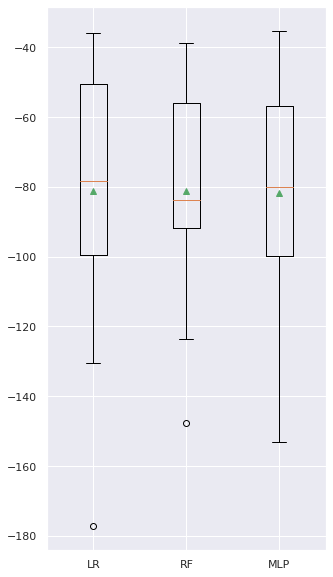

In [46]:
sns.set(rc={'figure.figsize':(5,10)})

bpMAPE= list()
for i in range(len(resultados)):
  rr= resultados[i]['test_neg_mean_absolute_percentage_error']
  bpMAPE.append(rr)
plt.boxplot(bpMAPE, labels=nombres, showmeans=True)
plt.show()

#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [42]:
modelo_MLP = MLPRegressor(max_iter=100000)

pipeline = Pipeline(steps = [('ct', columnasTransformer), ('modelo', modelo_MLP)])


modelo=TransformedTargetRegressor(regressor=pipeline, 
                                  func= y_Transform, 
                                  inverse_func= y_inverseTransform)

dicc_grid = [{
    "regressor__modelo__hidden_layer_sizes": [(20,)],  
    "regressor__modelo__alpha": [0.000001, ],
    "regressor__modelo__learning_rate_init": [0.000001]}]
      
kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)


grid = GridSearchCV(estimator=modelo, param_grid= dicc_grid, 
                      cv=kfold, scoring= make_scorer(mi_MAPE), n_jobs=-1)

grid.fit(X_train, np.ravel(y_train))


print('Mejor valor de MAPE obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrado en los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de MAPE obtenido con la mejor combinación: 263.0485735628118
Mejor combinación de valores encontrado en los hiperparámetros: {'regressor__modelo__alpha': 1e-06, 'regressor__modelo__hidden_layer_sizes': (20,), 'regressor__modelo__learning_rate_init': 1e-06}
Métrica utilizada: make_scorer(mi_MAPE)


#**Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de
los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor

In [44]:
# modelo_MLP = MLPRegressor(hidden_layer_sizes=grid.best_params_.get('regressor__modelo__hidden_layer_sizes'), 
#                           max_iter=100000, 
#                           alpha=grid.best_params_.get('regressor__modelo__alpha'), 
#                           learning_rate_init=grid.best_params_.get('regressor__modelo__learning_rate_init'))

modelo_MLP = MLPRegressor(hidden_layer_sizes=(20,), 
                          max_iter=100000, 
                          alpha=0.000001,
                          learning_rate_init=0.000001)

pipeline = Pipeline(steps = [('ct1', columnasTransformer), ('modelo', modelo_MLP)])


modelo=TransformedTargetRegressor(regressor=pipeline, 
                                  func= y_Transform, 
                                  inverse_func= y_inverseTransform)


modelo.fit(X_train, y_train.values.ravel())



r = permutation_importance(modelo, X_train, y_train, n_repeats=10, scoring= make_scorer(mi_MAPE, greater_is_better=False))
      
for i,v in enumerate(r['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(r['importances_mean']))], r['importances_mean'])
plt.show()


ValueError: ignored

#**Ejercicio-10.**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de
factores con este modelo con un diagrama de barras.

In [ ]:
modeloRFC= RandomForestRegressor()

pipeline = Pipeline(steps = [('ct1', columnasTransformer), ('modelo', modeloRFC)])


modeloRF_C=TransformedTargetRegressor(regressor=pipeline, 
                                  func= y_Transform, 
                                  inverse_func= y_inverseTransform)

dicc_grid = [{
    "regressor__modelo__max_depth": [12],  
    "regressor__modelo__ccp_alpha": [0.0001],
    "regressor__modelo__n_estimators": [400], "regressor__modelo__min_samples_split":[2], }]

kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)


grid = GridSearchCV(estimator=modeloRF_C, param_grid= dicc_grid, 
                      cv=kfold, scoring= make_scorer(mi_MAPE, greater_is_better=False), n_jobs=-1)


grid.fit(X_train, np.ravel(y_train))


print('Mejor valor de MAPE obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrado en los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)


#**Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de
factores con este modelo con un diagrama de barras

In [ ]:
modeloLR= LinearRegression()

pipeline = Pipeline(steps = [('ct1', columnasTransformer), ('modelo', modeloLR)])


modelo_MLP_C=TransformedTargetRegressor(regressor=pipeline, 
                                  func= y_Transform, 
                                  inverse_func= y_inverseTransform)

dicc_grid = [{
    "regressor__modelo__fit_intercept": [True, False]],  
    "regressor__modelo__n_jobs": [1,3,5]}]

kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(estimator=modelo, param_grid= dicc_grid, 
                      cv=kfold, scoring= make_scorer(mi_MAPE, greater_is_better=False), n_jobs=-1)


grid.fit(X_train, np.ravel(y_train))


print('Mejor valor de MAPE obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrado en los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)


#**Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con
respecto a MAPE. Incluye tus conclusiones finales de la actividad.

In [ ]:
None

###**Fin de la Actividad de la semana 7.**